In [2]:
%config IPCompleter.greedy = True
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#dataFrame_7 = pd.read_csv("fdata/featured/7daysfeatured.csv")
dataFrame_7 = pd.read_csv("data/7_feat.csv")
df_7 = dataFrame_7

In [4]:
#dataFrame_all = pd.read_csv("fdata/featured/alldaysfeatured.csv")
dataFrame_all = pd.read_csv("data/all_feat.csv")
df_all = dataFrame_all

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5eb9093c8>,
      dtype=object)

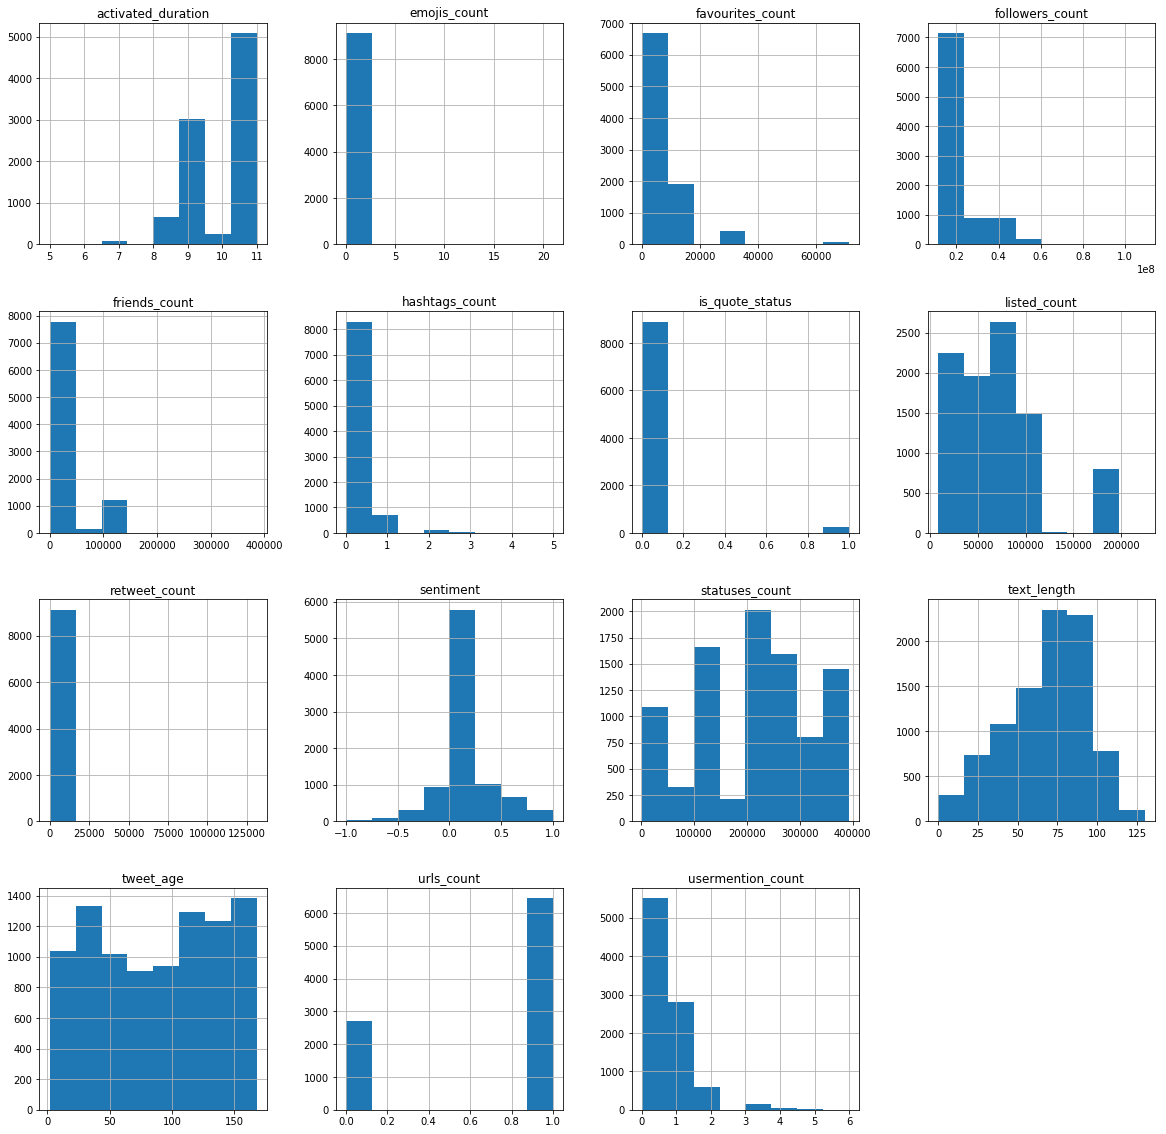

In [19]:
df_7.hist(bins=8, figsize = (20,20))

KeyboardInterrupt: 

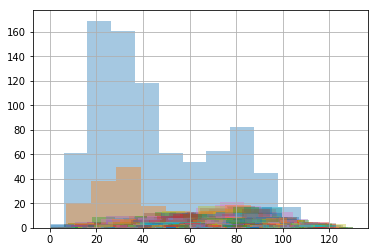

In [20]:
#df_7.groupby("retweet_count").tweet_age.plot(kind='kde')
df_7.groupby("retweet_count").text_length.hist(alpha=0.4)

In [ ]:
#feature relationship
from pandas.plotting import scatter_matrix
scatter_matrix(df_7, alpha=0.2, figsize=(40, 40), diagonal='kde')

In [ ]:
# visualizing pairwise relationship seaborn
plt.figure()
sns.pairplot(data=df_7[["retweet_count","followers_count","friends_count","usermention_count","emojis_count","activated_duration"]],
             hue="retweet_count", dropna=True)
plt.savefig("1_seaborn_pair_plot.png")
sns.pairplot(iris);
#sns.pairplot(df)

In [ ]:
# grdient type
g = sns.PairGrid(df_7[["retweet_count","followers_count","friends_count","usermention_count","emojis_count","activated_duration"])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [4]:
df_all.head()

,Unnamed: 0,id,text,created_at,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,...,lang,crawl_at,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration
0,0,1014234887094657024,touched carters story able pls help w chance d...,2018-07-03 19:50:15,1381,0,katyperry,109577041.0,216.0,141387.0,...,en,2018-07-04 03:22:08,0,0.500000,77,0,0,1,1,9
1,1,1010331219245125634,proud give gift transcendentalmeditation tour ...,2018-06-23 01:18:28,1652,0,katyperry,109577041.0,216.0,141387.0,...,en,2018-07-04 03:22:08,11,0.550000,84,1,0,1,0,9
2,2,1010243008812470273,found first skin tag today think im adult now ...,2018-06-22 19:27:57,2184,0,katyperry,109577041.0,216.0,141387.0,...,en,2018-07-04 03:22:08,11,0.175000,50,1,0,0,0,9
3,3,1009619630695034881,never forget everyone child,2018-06-21 02:10:52,14991,0,katyperry,109577041.0,216.0,141387.0,...,en,2018-07-04 03:22:08,13,0.000000,27,0,0,0,0,9
4,4,1009544070631264256,aussies amp kiwis finale witnessthetour thats...,2018-06-20 21:10:37,1551,0,katyperry,109577041.0,216.0,141387.0,...,en,2018-07-04 03:22:08,13,0.285714,78,1,0,1,2,9


# dont know about lang feature
* check if all are english alphabe language then ok
* else remove this feature

In [5]:
print(df_all.groupby('lang').text.count())
print(df_7.groupby('lang').text.count())

lang
ar          1
ca         63
cs         23
cy         82
da         90
de        184
en     266115
es       2511
et        225
eu         26
fi         33
fr        521
hi         40
ht        212
hu         24
in        422
is         17
it        242
ja         46
ko          2
lt         59
lv         21
nl        182
no         79
pl         84
pt        240
ro         47
ru          5
sl          9
sv         94
tl        606
tr        130
und     18090
vi          7
zh          5
Name: text, dtype: int64
lang
ca        6
cy        1
de        2
en     8848
es       29
et        3
fi        1
fr       13
hi        1
in       11
it        6
nl        3
pl        1
pt        2
ro        1
sv        3
tl        6
tr        4
und     203
zh        1
Name: text, dtype: int64


In [6]:
df_all.loc[df_all['lang'] == 'ar', 'text']
df_7.loc[df_7['lang'] == 'ar', 'text']

Series([], Name: text, dtype: object)

## finally we are selecting only english lang
* just taking english language en

In [7]:
df_all = df_all.drop( df_all[(df_all.lang != "en")].index )
df_7 = df_7.drop( df_7[(df_7.lang != "en")].index )

In [8]:
df_all.groupby('lang').text.count()
df_7.groupby('lang').text.count()

lang
en    8848
Name: text, dtype: int64

In [9]:
df_all = df_all.drop(['lang'], axis=1)
df_7 = df_7.drop(['lang'], axis=1)

In [17]:
df_all = df_all.drop(['Unnamed: 0', 'id', 'crawl_at'], axis=1)
df_7 = df_7.drop(['Unnamed: 0', 'id', 'crawl_at'], axis=1)

In [22]:
#df_7 = df_7.drop(['crawl_at'], axis=1)

In [21]:
df_all.head()

,text,created_at,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration
0,touched carters story able pls help w chance d...,2018-07-03 19:50:15,1381,0,katyperry,109577041.0,216.0,141387.0,6214,9220,0,0.500000,77,0,0,1,1,9
1,proud give gift transcendentalmeditation tour ...,2018-06-23 01:18:28,1652,0,katyperry,109577041.0,216.0,141387.0,6214,9220,11,0.550000,84,1,0,1,0,9
2,found first skin tag today think im adult now ...,2018-06-22 19:27:57,2184,0,katyperry,109577041.0,216.0,141387.0,6214,9220,11,0.175000,50,1,0,0,0,9
3,never forget everyone child,2018-06-21 02:10:52,14991,0,katyperry,109577041.0,216.0,141387.0,6214,9220,13,0.000000,27,0,0,0,0,9
4,aussies amp kiwis finale witnessthetour thats...,2018-06-20 21:10:37,1551,0,katyperry,109577041.0,216.0,141387.0,6214,9220,13,0.285714,78,1,0,1,2,9


In [38]:
df_7.head()

,text,created_at,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
0,touched carters story able pls help w chance d...,2018-07-03 19:50:15,1381,0,katyperry,109577041.0,216.0,141387.0,6214,9220,7,0.50,77,0,0,1,1,9,1,0
1,rt thwofd cynthia germanotta momgerm explains ...,2018-06-29 20:53:25,550,0,ladygaga,78902805.0,127004.0,224828.0,1915,8764,102,0.00,95,1,4,0,0,10,4,0
2,littlebigshots thursday theres better way cele...,2018-07-03 19:33:54,347,0,TheEllenShow,78052818.0,35730.0,107416.0,954,16970,7,0.25,81,1,0,1,0,9,1,0
3,tuesday mood kaceymusgraves,2018-07-03 18:33:27,87,0,TheEllenShow,78052818.0,35730.0,107416.0,954,16970,8,0.00,28,0,1,1,0,9,1,0
4,someone watching show gonna way riches,2018-07-03 17:59:37,101,0,TheEllenShow,78052818.0,35730.0,107416.0,954,16970,9,0.00,39,0,0,1,0,9,1,0


# found one feature :)

In [40]:
df_7['created_at'] = pd.to_datetime(df_7['created_at'])
df_all['created_at'] = pd.to_datetime(df_all['created_at'])
type(df_7['created_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
# df_7['dow'] = df_7['created_at'].apply(lambda x: x.date().weekday())
# df_7['is_weekend'] = df_7['created_at'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

df_all['dow'] = df_all['created_at'].apply(lambda x: x.date().weekday())
df_all['is_weekend'] = df_all['created_at'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [45]:
df_all[['created_at','dow', 'is_weekend']].head()

,created_at,dow,is_weekend
0,2018-07-03 19:50:15,1,0
1,2018-06-23 01:18:28,5,1
2,2018-06-22 19:27:57,4,0
3,2018-06-21 02:10:52,3,0
4,2018-06-20 21:10:37,2,0


In [46]:
df_7 = df_7.drop(['created_at'], axis=1)
df_all = df_all.drop(['created_at'], axis=1)

In [47]:
df_all.head()

,text,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
0,touched carters story able pls help w chance d...,1381,0,katyperry,109577041.0,216.0,141387.0,6214,9220,0,0.500000,77,0,0,1,1,9,1,0
1,proud give gift transcendentalmeditation tour ...,1652,0,katyperry,109577041.0,216.0,141387.0,6214,9220,11,0.550000,84,1,0,1,0,9,5,1
2,found first skin tag today think im adult now ...,2184,0,katyperry,109577041.0,216.0,141387.0,6214,9220,11,0.175000,50,1,0,0,0,9,4,0
3,never forget everyone child,14991,0,katyperry,109577041.0,216.0,141387.0,6214,9220,13,0.000000,27,0,0,0,0,9,3,0
4,aussies amp kiwis finale witnessthetour thats...,1551,0,katyperry,109577041.0,216.0,141387.0,6214,9220,13,0.285714,78,1,0,1,2,9,2,0


# Should I keep user_name
* if yes which one will be good idea to proceed
    * categorical value is huge so one hot encoding may not work well
    * vectorization ?
    * mark them as numeric value from 1 - 100 ?
* if, give strong reason not to include

Text(0,0.5,'Frequency')

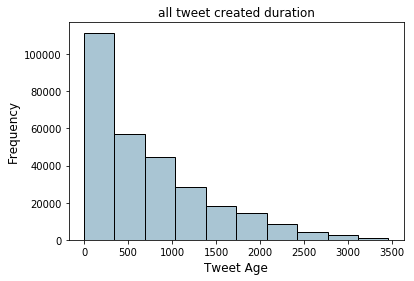

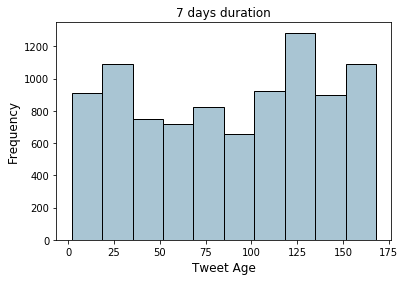

In [5]:
fig, ax = plt.subplots()
df_all['tweet_age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('all tweet created duration', fontsize=12)
ax.set_xlabel('Tweet Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

fig, ax = plt.subplots()
df_7['tweet_age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('7 days duration', fontsize=12)
ax.set_xlabel('Tweet Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


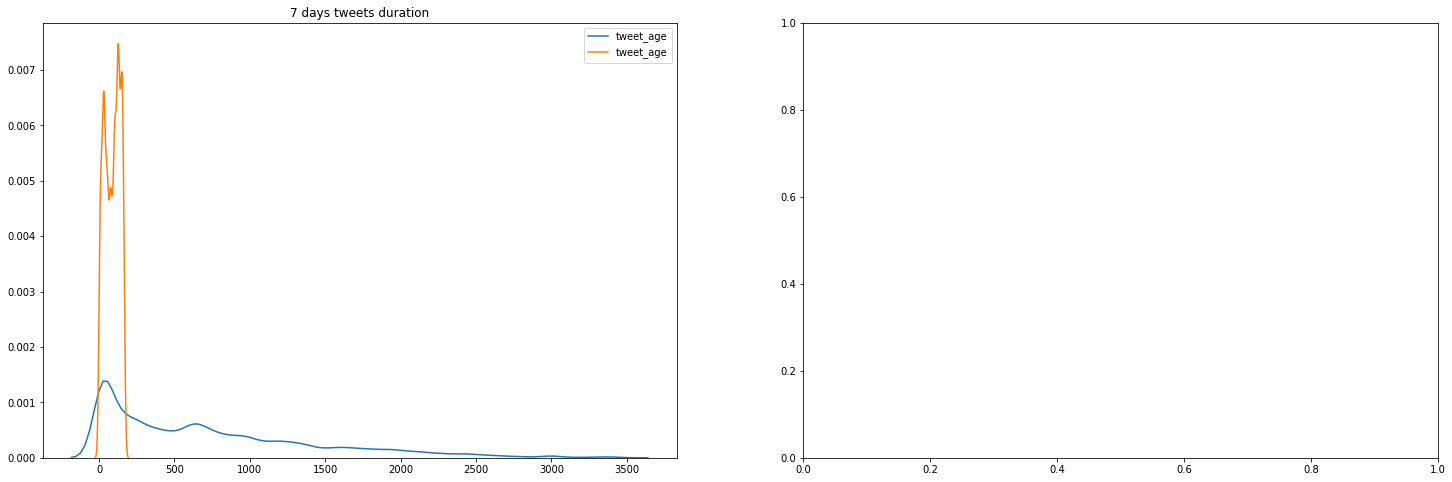

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 8))

ax1.set_title('All tweets duration')
sns.kdeplot(df_all['tweet_age'], ax=ax1)

ax1.set_title('7 days tweets duration')
sns.kdeplot(df_7['tweet_age'], ax=ax1)

plt.show()

In [5]:
# we dont need favourites_count feature
df_all = df_all.drop(['favourites_count'], axis=1)
df_7 = df_7.drop(['favourites_count'], axis=1)

## before scaling

In [60]:
#if you want to remove one column
#scale_df_7 = df_7.loc[:, df_7.columns != 'text']
#scale_df_all = df_all.loc[:, df_all.columns != 'text']
# scale_df_7 = df_7[df_7.columns.difference(['text', 'user_name'])]
# scale_df_all = df_all[df_all.columns.difference(['text', 'user_name'])]
scale_df_7 = df_7.copy()
scale_df_all = df_all.copy()

In [77]:
print(scale_df_all.keys())
print(scale_df_7.keys())

Index(['text', 'retweet_count', 'is_quote_status', 'user_name',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'tweet_age', 'sentiment', 'text_length',
       'hashtags_count', 'usermention_count', 'urls_count', 'emojis_count',
       'activated_duration', 'dow', 'is_weekend'],
      dtype='object')
Index(['text', 'retweet_count', 'is_quote_status', 'user_name',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'tweet_age', 'sentiment', 'text_length',
       'hashtags_count', 'usermention_count', 'urls_count', 'emojis_count',
       'activated_duration', 'dow', 'is_weekend'],
      dtype='object')


In [114]:
df_7.keys()

Index(['text', 'retweet_count', 'is_quote_status', 'user_name',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'tweet_age', 'sentiment', 'text_length',
       'hashtags_count', 'usermention_count', 'urls_count', 'emojis_count',
       'activated_duration', 'dow', 'is_weekend'],
      dtype='object')

In [143]:
df_7.to_csv("data/rawScaled7.csv", sep=',', encoding='utf-8', index=False)
df_all.to_csv("data/rawScaledAll.csv", sep=',', encoding='utf-8', index=False)

In [137]:
df7_train = df_7.copy()
df7_train = df7_train.drop(['retweet_count'], axis=1)
df7_test = pd.DataFrame(data=df_7.retweet_count)

## for all data
dfAll_train = df_all.copy()
dfAll_train = dfAll_train.drop(['retweet_count'], axis=1)
dfAll_test = pd.DataFrame(data=df_all.retweet_count)

In [138]:
dfAll_train.head()

,text,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
0,touched carters story able pls help w chance d...,0,katyperry,109577041.0,216.0,141387.0,6214,9220,0,0.500000,77,0,0,1,1,9,1,0
1,proud give gift transcendentalmeditation tour ...,0,katyperry,109577041.0,216.0,141387.0,6214,9220,11,0.550000,84,1,0,1,0,9,5,1
2,found first skin tag today think im adult now ...,0,katyperry,109577041.0,216.0,141387.0,6214,9220,11,0.175000,50,1,0,0,0,9,4,0
3,never forget everyone child,0,katyperry,109577041.0,216.0,141387.0,6214,9220,13,0.000000,27,0,0,0,0,9,3,0
4,aussies amp kiwis finale witnessthetour thats...,0,katyperry,109577041.0,216.0,141387.0,6214,9220,13,0.285714,78,1,0,1,2,9,2,0


In [139]:
dfAll_test.head()

,retweet_count
0,1381
1,1652
2,2184
3,14991
4,1551


In [140]:
#Scale fit only train data test data only transform
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df7_train, df7_test, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(dfAll_train, dfAll_test, test_size=0.2)

In [142]:
X_train.keys()

Index(['text', 'is_quote_status', 'user_name', 'followers_count',
       'friends_count', 'listed_count', 'favourites_count', 'statuses_count',
       'tweet_age', 'sentiment', 'text_length', 'hashtags_count',
       'usermention_count', 'urls_count', 'emojis_count', 'activated_duration',
       'dow', 'is_weekend'],
      dtype='object')

In [ ]:
# Use StandardScaler
#not including text, user_name, is_quoted, sentiment
# features = ['retweet_count', 'followers_count', 'friends_count', 'listed_count', 'favourites_count',
#        'statuses_count', 'tweet_age', 'text_length',
#        'hashtags_count', 'usermention_count', 'urls_count', 'emojis_count',
#        'activated_duration', 'dow', 'is_weekend']

features = ['retweet_count', 'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'tweet_age', 'text_length',
       'hashtags_count', 'usermention_count', 'urls_count', 'emojis_count',
       'activated_duration', 'dow', 'is_weekend']

scaler = preprocessing.MinMaxScaler()
scale_df_7[features] = scaler.fit_transform(scale_df_7[features])
scale_df_all[features] = scaler.fit_transform(scale_df_all[features])

In [94]:
scale_df_all.head()

,text,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
0,touched carters story able pls help w chance d...,0.000381,0,katyperry,1.0,0.000348,0.232229,0.087127,0.020573,0.000000,0.500000,0.538462,0.0,0.0,1.0,0.028571,0.666667,0.166667,0.0
1,proud give gift transcendentalmeditation tour ...,0.000456,0,katyperry,1.0,0.000348,0.232229,0.087127,0.020573,0.003183,0.550000,0.587413,0.1,0.0,1.0,0.000000,0.666667,0.833333,1.0
2,found first skin tag today think im adult now ...,0.000602,0,katyperry,1.0,0.000348,0.232229,0.087127,0.020573,0.003183,0.175000,0.349650,0.1,0.0,0.0,0.000000,0.666667,0.666667,0.0
3,never forget everyone child,0.004134,0,katyperry,1.0,0.000348,0.232229,0.087127,0.020573,0.003762,0.000000,0.188811,0.0,0.0,0.0,0.000000,0.666667,0.500000,0.0
4,aussies amp kiwis finale witnessthetour thats...,0.000428,0,katyperry,1.0,0.000348,0.232229,0.087127,0.020573,0.003762,0.285714,0.545455,0.1,0.0,1.0,0.057143,0.666667,0.333333,0.0


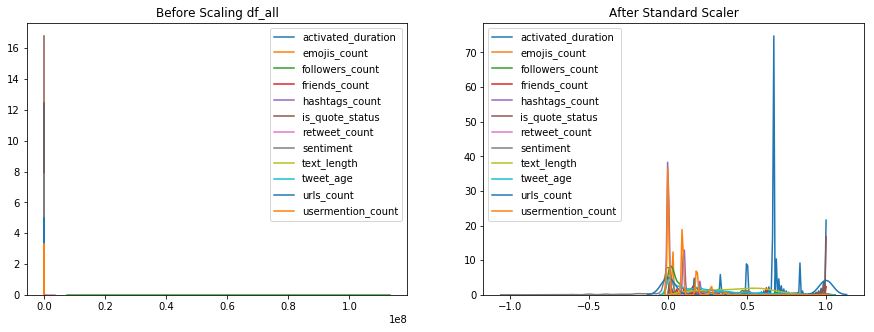

In [101]:
# Plot and visualize
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.set_title('Before Scaling df_all')
sns.kdeplot(df_all['activated_duration'], ax=ax1)
sns.kdeplot(df_all['emojis_count'], ax=ax1)
sns.kdeplot(df_all['followers_count'], ax=ax1)
sns.kdeplot(df_all['friends_count'], ax=ax1)
sns.kdeplot(df_all['hashtags_count'], ax=ax1)
sns.kdeplot(df_all['is_quote_status'], ax=ax1)
sns.kdeplot(df_all['retweet_count'], ax=ax1)
sns.kdeplot(df_all['sentiment'], ax=ax1)
sns.kdeplot(df_all['text_length'], ax=ax1)
sns.kdeplot(df_all['tweet_age'], ax=ax1)
sns.kdeplot(df_all['urls_count'], ax=ax1)
sns.kdeplot(df_all['usermention_count'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scale_df_all['activated_duration'], ax=ax2)
sns.kdeplot(scale_df_all['emojis_count'], ax=ax2)
sns.kdeplot(scale_df_all['followers_count'], ax=ax2)
sns.kdeplot(scale_df_all['friends_count'], ax=ax2)
sns.kdeplot(scale_df_all['hashtags_count'], ax=ax2)
sns.kdeplot(scale_df_all['is_quote_status'], ax=ax2)
sns.kdeplot(scale_df_all['retweet_count'], ax=ax2)
sns.kdeplot(scale_df_all['sentiment'], ax=ax2)
sns.kdeplot(scale_df_all['text_length'], ax=ax2)
sns.kdeplot(scale_df_all['tweet_age'], ax=ax2)
sns.kdeplot(scale_df_all['urls_count'], ax=ax2)
sns.kdeplot(scale_df_all['usermention_count'], ax=ax2)

plt.show()

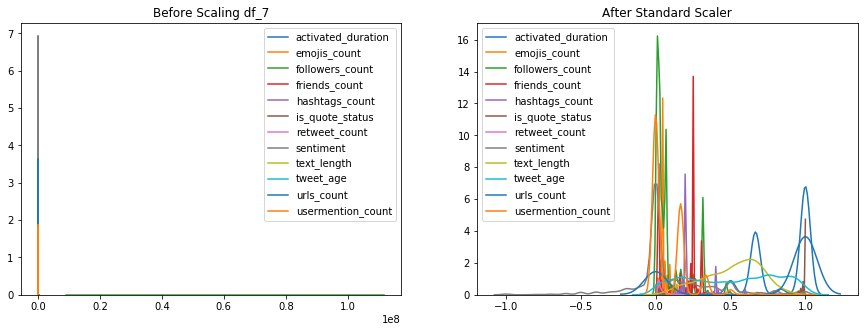

In [102]:
# Plot and visualize
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.set_title('Before Scaling df_7')
sns.kdeplot(df_7['activated_duration'], ax=ax1)
sns.kdeplot(df_7['emojis_count'], ax=ax1)
sns.kdeplot(df_7['followers_count'], ax=ax1)
sns.kdeplot(df_7['friends_count'], ax=ax1)
sns.kdeplot(df_7['hashtags_count'], ax=ax1)
sns.kdeplot(df_7['is_quote_status'], ax=ax1)
sns.kdeplot(df_7['retweet_count'], ax=ax1)
sns.kdeplot(df_7['sentiment'], ax=ax1)
sns.kdeplot(df_7['text_length'], ax=ax1)
sns.kdeplot(df_7['tweet_age'], ax=ax1)
sns.kdeplot(df_7['urls_count'], ax=ax1)
sns.kdeplot(df_7['usermention_count'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scale_df_7['activated_duration'], ax=ax2)
sns.kdeplot(scale_df_7['emojis_count'], ax=ax2)
sns.kdeplot(scale_df_7['followers_count'], ax=ax2)
sns.kdeplot(scale_df_7['friends_count'], ax=ax2)
sns.kdeplot(scale_df_7['hashtags_count'], ax=ax2)
sns.kdeplot(scale_df_7['is_quote_status'], ax=ax2)
sns.kdeplot(scale_df_7['retweet_count'], ax=ax2)
sns.kdeplot(scale_df_7['sentiment'], ax=ax2)
sns.kdeplot(scale_df_7['text_length'], ax=ax2)
sns.kdeplot(scale_df_7['tweet_age'], ax=ax2)
sns.kdeplot(scale_df_7['urls_count'], ax=ax2)
sns.kdeplot(scale_df_7['usermention_count'], ax=ax2)

plt.show()

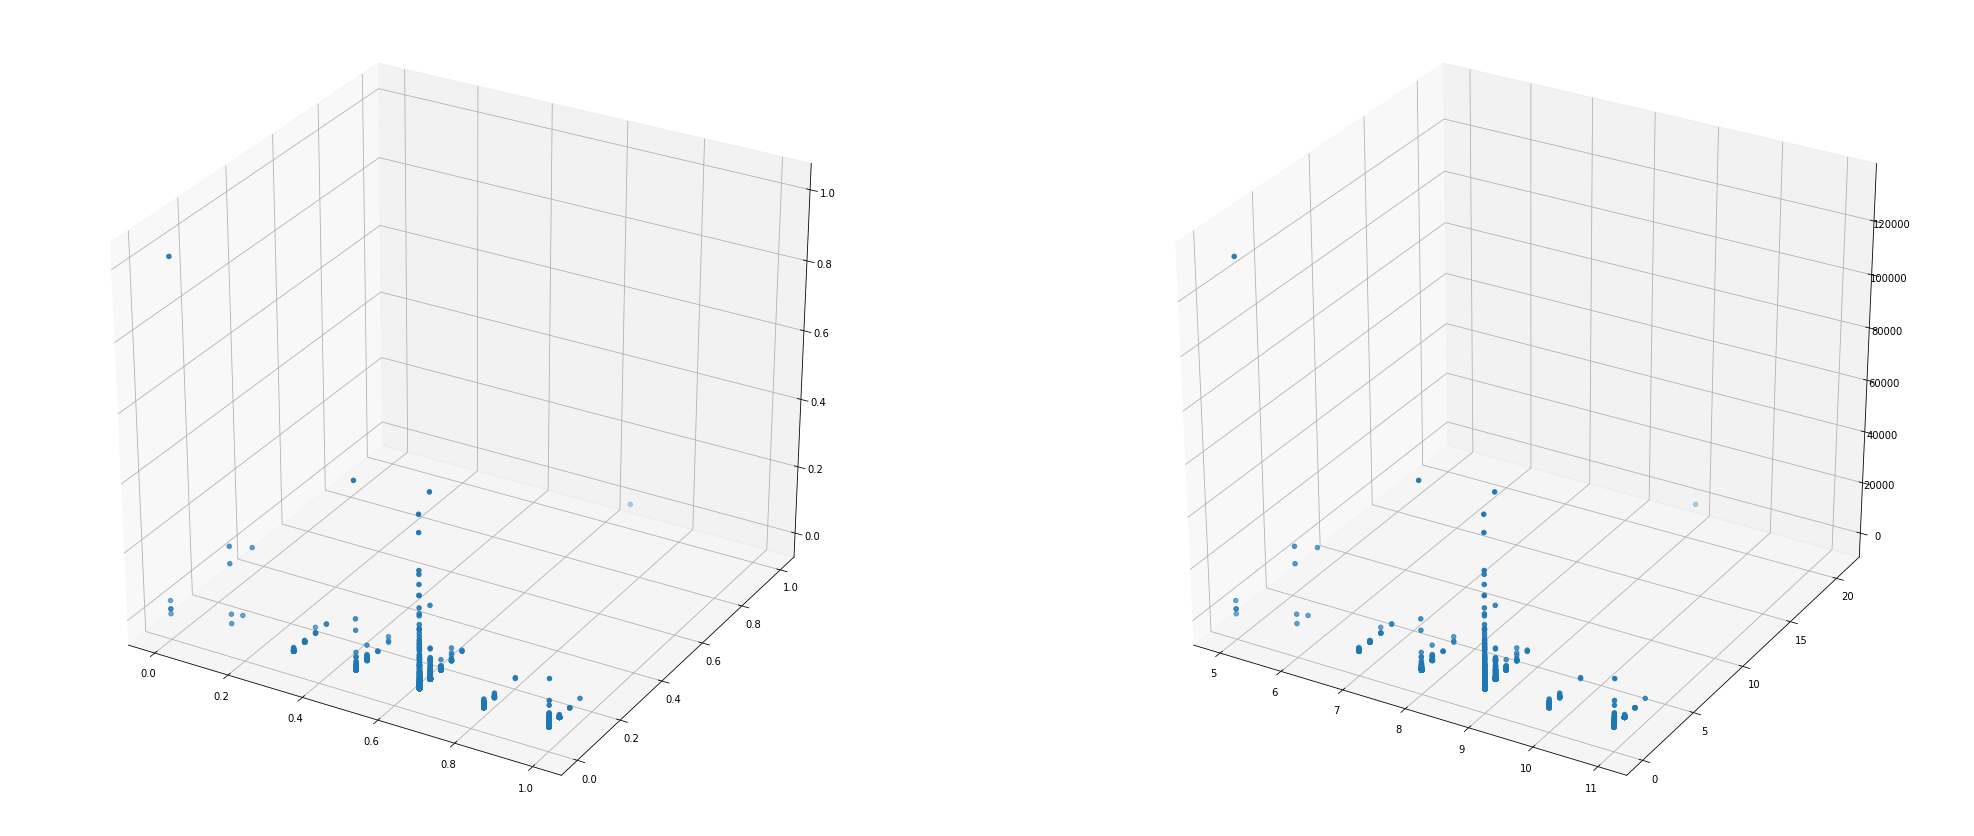

In [112]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(35, 15))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(scale_df_7['activated_duration'], scale_df_7['emojis_count'], scale_df_7['retweet_count'])
ax2.scatter(df_7['activated_duration'], df_7['emojis_count'], df_7['retweet_count'])
plt.show()

In [91]:
df_7['friends_count'].describe()

count      8848.000000
mean      15523.517292
std       34878.522913
min           1.000000
25%         530.000000
50%        1112.000000
75%        2560.000000
max      386042.000000
Name: friends_count, dtype: float64

### After Feature Scalling save data

In [96]:
df_7.loc[scale_df_7['friends_count'].idxmax()]

text                  sunsets always delight 
retweet_count                             328
is_quote_status                             0
user_name                       britneyspears
followers_count                   5.82381e+07
friends_count                          386042
listed_count                           121445
favourites_count                         2554
statuses_count                           5476
tweet_age                                   4
sentiment                                   0
text_length                                23
hashtags_count                              0
usermention_count                           0
urls_count                                  0
emojis_count                                0
activated_duration                          9
dow                                         1
is_weekend                                  0
Name: 73, dtype: object

In [97]:
scale_df_7.to_csv("data/scaled7.csv", sep=',', encoding='utf-8', index=False)
scale_df_all.to_csv("data/scaledAll.csv", sep=',', encoding='utf-8', index=False)